## KD 周線

In [4]:
import datetime
import pandas as pd
from talib import abstract
from email.mime.text import MIMEText
from tqdm import tqdm 

#製作 Stock_ID
st_data = pd.read_excel('stock_id.xlsx',dtype=str)
ind=[str(i) for i in list(st_data.num)]
s_name=list(st_data.name)
st_d={}
for i in range(len(ind)):
    st_d[ind[i]]=s_name[i]

s_id=list((st_data.num)) #全部的股票代號
#已買清單
buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])

s_id=s_id[138:]
bad=[]
for i in (s_id):
    #設定爬蟲時間
    start = datetime.datetime.now() - datetime.timedelta(days=360)
    end = datetime.date.today()
    #導入pandas_datareader
    from pandas_datareader import data
    # 與yahoo請求，套件路徑因版本不同
    pd.core.common.is_list_like = pd.api.types.is_list_like
    try:
        stock_dr = data.get_data_yahoo(i+'.TW', start, end, interval='w')
    except:
        print(i+" 已經下市")
        bad+=[i]
        continue

1240 已經下市
1258 已經下市
1259 已經下市
1262 已經下市
1264 已經下市
1268 已經下市
1333 已經下市
1336 已經下市
1565 已經下市
1566 已經下市
1569 已經下市
1570 已經下市
1580 已經下市
1584 已經下市
1586 已經下市
1591 已經下市
1593 已經下市
1595 已經下市
1599 已經下市
1742 已經下市
1752 已經下市
1777 已經下市
1781 已經下市
1784 已經下市
1785 已經下市
1787 已經下市
1788 已經下市
1796 已經下市
1799 已經下市
1813 已經下市
1815 已經下市
1902 已經下市
2035 已經下市
2061 已經下市
2063 已經下市
2064 已經下市
2065 已經下市
2066 已經下市
2067 已經下市
2070 已經下市
2221 已經下市
2230 已經下市
2235 已經下市
2448 已經下市
2596 已經下市
2640 已經下市
2641 已經下市
2643 已經下市
2718 已經下市
2719 已經下市
2724 已經下市
2726 已經下市
2729 已經下市
2732 已經下市
2734 已經下市
2736 已經下市
2740 已經下市
2743 已經下市
2745 已經下市
2752 已經下市
2754 已經下市
2755 已經下市
2916 已經下市
2924 已經下市
2926 已經下市
2928 已經下市
2937 已經下市
3064 已經下市
3066 已經下市
3067 已經下市
3071 已經下市
3073 已經下市
3078 已經下市
3081 已經下市
3083 已經下市
3085 已經下市
3086 已經下市
3088 已經下市
3089 已經下市
3092 已經下市
3093 已經下市
3095 已經下市
3105 已經下市
3114 已經下市
3115 已經下市
3118 已經下市
3122 已經下市
3128 已經下市
3131 已經下市
3141 已經下市
3144 已經下市
3147 已經下市
3152 已經下市
3162 已經下市
3163 已經下市
3169 已經下市
3171 已經下市
3176 已經下市
3178 已經下市
3188 已經下市


In [ ]:
import datetime
import pandas as pd
from talib import abstract
from email.mime.text import MIMEText
import smtplib
from tqdm import tqdm 
import os
import concurrent.futures
#導入pandas_datareader
from pandas_datareader import data
#製作 Stock_ID
st_data = pd.read_excel('stock_id.xlsx',dtype=str)
s_id=[str(i) for i in list(st_data.num)] #全部的股票代號
s_name=list(st_data.name)
st_d={}
for i in range(len(s_id)):
    st_d[s_id[i]]=s_name[i]
# ############################################## 
# #已買清單
# buy_list=list(pd.read_excel('buy_list.xlsx',dtype=str)[0])
# ##############################################
# #過去的推薦買賣股票
# if os.path.isfile('buy_id.xlsx') and os.path.isfile('sell_id.xlsx'):
#     b=pd.read_excel('buy_id.xlsx',dtype={0:str})[0]
#     s=pd.read_excel('sell_id.xlsx',dtype={0:str})[0]

# else:
#     b=[]
#     s=[]
# buy_last=list(b[:])
# sell_last=list(s[:])
# sum_buy=0
# sum_sell=0


#設定爬蟲股票代號
# s_id=['0050','1219','2480','2324','2330','2498']


start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
pd.core.common.is_list_like = pd.api.types.is_list_like

def stock_m(s_id, st_d, beg_id, end_id):
    buy=[]
    sell=[]
    out_of_market = []
    for i in s_id[beg_id:end_id]:
        #設定爬蟲時間
        try:
            stock_dr = data.get_data_yahoo(i+'.TW', start, end, interval='w')
        except:
            print(str(i)+ ' ' + st_d[i] +" 已經下市")
            out_of_market+=[i]
            continue
        stock_dr.columns=['high','low','open','close','volume','adj close']


        if stock_dr.iloc[-1].open < 300 and stock_dr.iloc[-1].volume>5000000:  #取價格小於 300,且量大於5000張
#             #accuracy
#             if i in buy_last:
#                 if stock_dr.iloc[-1].open <  stock_dr.iloc[-1].close:
#                     sum_buy+=1
#             if i in sell_last:
#                 if stock_dr.iloc[-1].open >  stock_dr.iloc[-1].close:
#                     sum_sell+=1        

            try:
                kd=abstract.STOCH(stock_dr,fastk=9)
            except:
                print(str(i)+' kd fail')
                continue
            cross=kd.iloc[-2:]
    #         print(i,cross)

            for j in range(len(cross)-1):
                #print(j)
                if cross.slowd.iloc[j] > cross.slowk.iloc[j] and cross.slowd.iloc[j+1] < cross.slowk.iloc[j+1] and cross.slowk.iloc[j+1]<90:
                    #print(' +  : ',cross.index[j])
                    buy+=[[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' + ']]
                elif cross.slowd.iloc[j] < cross.slowk.iloc[j] and cross.slowd.iloc[j+1] > cross.slowk.iloc[j+1] :
                    sell+=[[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ']]
                    #print(' -  : ',cross.index[j])
#                     if i in buy_list:
#                         sell+=[[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ***']]
#                     else:
#                         sell+=[[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ']]
                        
    return(buy, sell, out_of_market)

##################################################################
#切割任務
#製作切割開始結束的位置list
div_list=[0]
part=120
start_div=0
for i in range(part-1):
    div_list+=[start_div + len(s_id)//part]
    start_div+=len(s_id)//part
div_list+=[len(s_id)]
t=[]
buy=[]
sell=[]
out_of_market=[]
with concurrent.futures.ThreadPoolExecutor() as executor:
    for i in range(part):
        t+=[executor.submit(stock_m, s_id, st_d, div_list[i],div_list[i+1])]
    for i in range(part):
        if t[i].result()[0] != []:
            buy+=[t[i].result()[0][0]] 
        if t[i].result()[1] != []:
            sell+=[t[i].result()[1][0]] 
        if t[i].result()[2] != []:
            out_of_market+=[t[i].result()[2][0]]
    


print('Stock crawler Finish !')
buy_id=[]
sell_id=[]
for i in buy:
    buy_id+=[[i[0],i[1],i[2]]]
for i in sell:
    sell_id+=[[i[0],i[1],i[2]]]
print('buy : ',buy_id)
print('\n')
print('sell : ',sell_id)
print('#################################################################################')
##############################################################
#寄信
import smtplib
smtp=smtplib.SMTP('smtp.gmail.com', 587)
smtp.ehlo()
smtp.starttls()
smtp.login('hsustock12345@gmail.com','Qaz78900')

#寄/收件人
from_addr='hsustock12345@gmail.com'
to_addr=['hsusean1219@gmail.com','stevenlinlyc860415@gmail.com','spencer8005@yahoo.com.tw',
         'davidlv7621@yahoo.com.tw','anderson831208@gmail.com','Jeremy.Hsu@sti.com.tw','emailirene2006@gmail.com']
# to_addr=['hsusean1219@gmail.com']

#推薦名單
recommend_buy = buy_id
recommend_sell = sell_id

#編輯內文
msg=""
msg+="Buy\n"
if len(recommend_buy)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_buy:
        if i == recommend_buy[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
msg+="Sell\n"
if len(recommend_sell)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_sell:
        if i == recommend_sell[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
            
#輸入內容
text = MIMEText(msg, 'plain', 'utf-8')
text['From'] = u'台灣巴菲哲'
text['Subject'] =u'自動報明牌系統'

#寄信        
for k in to_addr:
    status=smtp.sendmail(from_addr, k, text.as_string())#加密文件，避免私密信息被截取 發現信的內容不能有":"            

#確認
if status=={}:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送成功!")
else:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送失敗!")
smtp.quit()



00636 kd fail
1597 kd fail
1342 kd fail


In [11]:
#寄信
import smtplib
smtp=smtplib.SMTP('smtp.gmail.com', 587)
smtp.ehlo()
smtp.starttls()
smtp.login('hsustock12345@gmail.com','Qaz78900')

#寄/收件人
from_addr='hsustock12345@gmail.com'
to_addr=['hsusean1219@gmail.com','stevenlinlyc860415@gmail.com','spencer8005@yahoo.com.tw',
         'davidlv7621@yahoo.com.tw','anderson831208@gmail.com','Jeremy.Hsu@sti.com.tw','emailirene2006@gmail.com']
# to_addr=['hsusean1219@gmail.com','Jeremy.Hsu@sti.com.tw']
# to_addr=['hsusean1219@gmail.com']

#推薦名單
recommend_buy = buy_id
recommend_sell = sell_id

#編輯內文
msg=""
msg+="Buy\n"
if len(recommend_buy)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_buy:
        if i == recommend_buy[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
msg+="Sell\n"
if len(recommend_sell)==0:
    msg+="None!!\n\n"
else:
    for i in recommend_sell:
        if i == recommend_sell[-1]:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+" !\n\n"
        else:
            msg+= i[0]+' '+i[1]+" Price "+ str(round(i[2],2))+",\n"
            
#輸入內容
text = MIMEText(msg, 'plain', 'utf-8')
text['From'] = u'台灣巴菲哲'
text['Subject'] =u'自動報明牌系統'

#寄信        
for k in to_addr:
    status=smtp.sendmail(from_addr, k, text.as_string())#加密文件，避免私密信息被截取 發現信的內容不能有":"            

#確認
if status=={}:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送成功!")
else:
    print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')+"  郵件傳送失敗!")
smtp.quit()

2021-03-06 13:21:16  郵件傳送成功!


(221, b'2.0.0 closing connection m21sm3652397pff.61 - gsmtp')

查詢勝率

股票代號: 5515
盈餘:  3949.9998092651367 元(以1張為單位)
買進日期:  [Timestamp('2020-07-06 00:00:00'), Timestamp('2020-08-03 00:00:00'), Timestamp('2020-11-02 00:00:00'), Timestamp('2020-12-21 00:00:00'), Timestamp('2021-02-17 00:00:00')]
賣出日期:  [Timestamp('2020-07-20 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-11-30 00:00:00'), Timestamp('2021-01-04 00:00:00')]


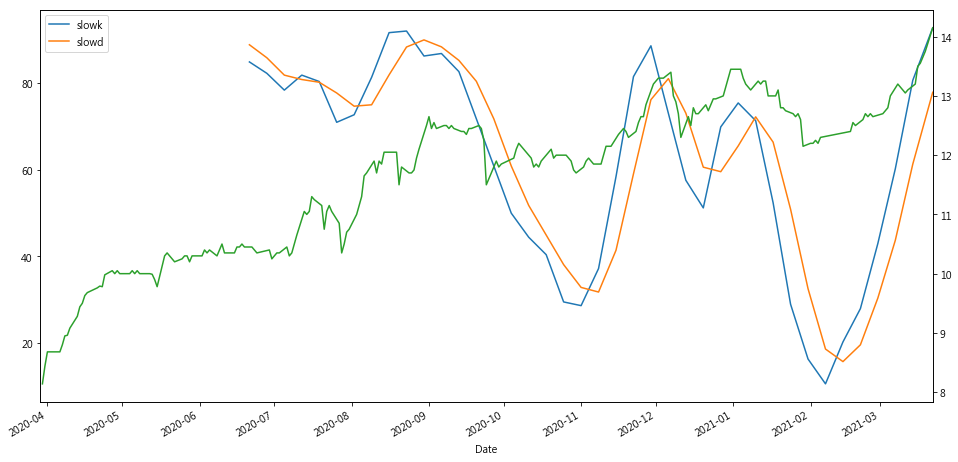

In [6]:
import datetime
import pandas as pd
from talib import abstract
from email.mime.text import MIMEText
from tqdm import tqdm 
from pandas_datareader import data
sid = '5515'
start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
stock_dr_d = data.get_data_yahoo(sid+'.TW', start, end, interval="d")
stock_dr_w = data.get_data_yahoo(sid+'.TW', start, end, interval="w")
stock_dr_d.columns=['high','low','open','close','volume','adj close']
stock_dr_w.columns=['high','low','open','close','volume','adj close']
kd=abstract.STOCH(stock_dr_w,fastk=9)
kd=kd.dropna()
w_date=list(kd.index[:])
date_pos=[]
date_neg=[]
buy_price=0
earn=0
for i in range(len(w_date)-1):
    #找交叉
#     print(earn)
    if kd.slowd.iloc[i] > kd.slowk.iloc[i] and kd.slowd.iloc[i+1] < kd.slowk.iloc[i+1] :
        while w_date[i] not in stock_dr_d.index:
            w_date[i] += datetime.timedelta(days=1)
        date_pos+=[w_date[i]]
        buy_price=stock_dr_d.loc[w_date[i]].open
    elif kd.slowd.iloc[i] < kd.slowk.iloc[i] and kd.slowd.iloc[i+1] > kd.slowk.iloc[i+1] :
        while w_date[i] not in stock_dr_d.index:
            w_date[i] += datetime.timedelta(days=1)
        date_neg+=[w_date[i]]
        if buy_price==0:
            earn+=0
        else:
            earn += stock_dr_d.loc[w_date[i]].open - buy_price
print("股票代號:", sid)
print("盈餘: ",round(earn*1000,2),"元(以1張為單位)")
print("買進日期: ",date_pos)
print("賣出日期: ",date_neg)
abstract.STOCH(stock_dr_w,fastk_period=9).plot(figsize=(16,8))
stock_dr_d['close'].plot(secondary_y=True)

自動將推薦個股以 Mail 寄送

查詢個股現況

                slowk      slowd
Date                            
2021-04-04  56.638139  50.420598
2021-04-09  67.039719  57.892619


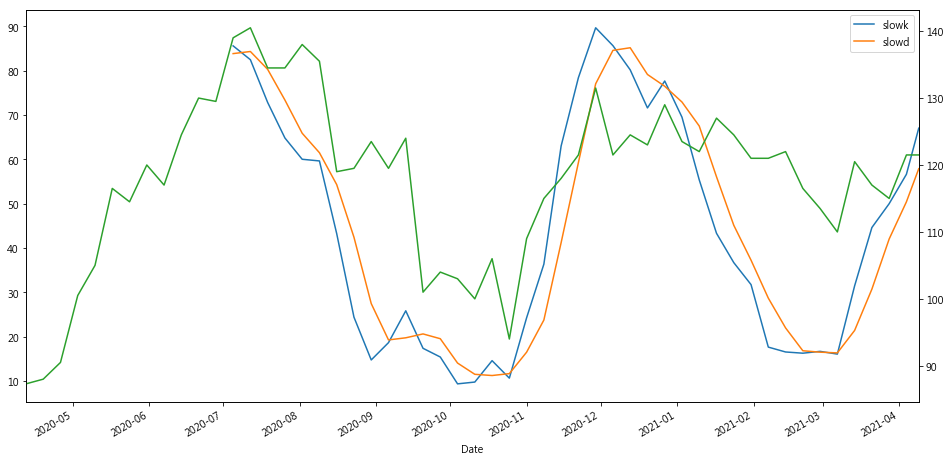

In [7]:
import datetime
import pandas as pd
from talib import abstract
from email.mime.text import MIMEText
from tqdm import tqdm 
sid = '6278'
start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
from pandas_datareader import data
pd.core.common.is_list_like = pd.api.types.is_list_like
stock_dr = data.get_data_yahoo(sid+'.TW', start, end, interval="w")
stock_dr.columns=['high','low','open','close','volume','adj close']
# abstract.STOCH(stock_dr,fastk_period=1)
kd=abstract.STOCH(stock_dr,fastk_period=9)
print(kd[-2:])
abstract.STOCH(stock_dr,fastk_period=9).plot(figsize=(16,8))
stock_dr['close'].plot(secondary_y=True)


In [9]:
kd3=abstract.STOCH(stock_dr,fastk_period=9)


print(kd3[-2:])

                slowk      slowd
Date                            
2021-04-04  56.638139  50.420598
2021-04-09  67.039719  57.892619


In [3]:
abstract.STOCH

{'name': 'STOCH', 'group': 'Momentum Indicators', 'display_name': 'Stochastic', 'function_flags': None, 'input_names': OrderedDict([('prices', ['high', 'low', 'close'])]), 'parameters': OrderedDict([('fastk_period', 5), ('slowk_period', 3), ('slowk_matype', 0), ('slowd_period', 3), ('slowd_matype', 0)]), 'output_flags': OrderedDict([('slowk', ['Dashed Line']), ('slowd', ['Dashed Line'])]), 'output_names': ['slowk', 'slowd']}

In [1]:
sid = '1259'
start = datetime.datetime.now() - datetime.timedelta(days=360)
end = datetime.date.today()
from pandas_datareader import data
pd.core.common.is_list_like = pd.api.types.is_list_like
stock_dr = data.get_data_yahoo(sid+'.TW', start, end, interval="w")
stock_dr.columns=['high','low','open','close','volume','adj close']        
kd=abstract.STOCH(stock_dr,fastk=9)
cross=kd.iloc[-3:]
buy1=[]
sell1=[]
for j in range(len(cross)-1):
    #print(j)
    if cross.slowd.iloc[j] > cross.slowk.iloc[j] and cross.slowd.iloc[j+1] < cross.slowk.iloc[j+1] and cross.slowd.iloc[j+1]<30:
        #print(' +  : ',cross.index[j])
        buy1+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' + ']
    elif cross.slowd.iloc[j] < cross.slowk.iloc[j] and cross.slowd.iloc[j+1] > cross.slowk.iloc[j+1] :

        #print(' -  : ',cross.index[j])
        if i in buy_list:
            sell1+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ***']
        else:
            sell1+=[i,st_d[i],stock_dr.iloc[-1].open,cross.index[j],' - ']
buy1

NameError: name 'datetime' is not defined

In [26]:
cross

,slowk,slowd
Date,,
2021-02-21,65.557051,68.439653
2021-02-28,64.637348,65.620355
2021-03-05,58.939114,63.044504


In [ ]:
!pyinstaller -F ./stock_king.py